## I. Optimize Objective Function

Assuming that data comes from a linear model $Y_i = \beta_0+\beta_1 X_i$, simple linear regression using least square method aims to find the line that minimizes the following objective function:
$$Q(b_0,b_1) = \sum_i (y_i-\hat y_i)^2 = \sum_i (y_i-b_0-b_1 \hat y_i)^2$$
We could solve this using the R builtin linear regression function, but we can also solve it by optimizing the objective function, which in this case is the least squared error function. We could imagine defining any other objective function (e.g. sum of absolute error or sum of Euclidean distance) we desire and solve for the line of best fit using this approach.

In [2]:
# simulate some data
n <- 100
x <- rexp(n,rate=2)
b0 <- 10
b1 <- 5
error <- rnorm(n, sd=3)
y <- b0+b1*x+error

In [3]:
# objective function
least_square_objective <- function(params, x, y){
    b0_hat <- params[1]
    b1_hat <- params[2]
    SSE <- sum((y-b0_hat-b1_hat*x)^2)
}
# optimize
opt <- optim(c(10,5),least_square_objective,x=x,y=y)
opt$par
# compare with R's built-in linear regression function
slr <- lm(y~x)
slr$coefficients

[1] 10.998566  3.561141

(Intercept)           x 
  10.998271    3.561495

We could change the objective function to anything according to our needs. For example, suppose we are interested in optimizing the least absolute value:
$\min_{b_0,b_1} \sum_i |y_i-\hat y_i|$

In [4]:
# objective function
least_absolute_obj <- function(params, x, y){
    b0_hat <- params[1]
    b1_hat <- params[2]
    sum(abs(y-b0_hat-b1_hat*x))
}
#optimize
opt2 <- optim(c(10,5),least_absolute_obj,x=x,y=y)
opt2$par

[1] 10.669207  3.889116

Or we could find $\hat \beta_0$, $\hat \beta_1$ using MLE, in which case the objective function will be the log likelihood function $\sum_i \log f(y_i | \sigma)$.

In [6]:
n <- 100
x <- runif(n, min=0,max=1)
beta0 <- 0
beta1 <- 1
error <- rnorm(n)
y <- beta0+beta1*x+error

mle_obj <- function(params,x,y){
    b0 <- params[1]
    b1 <- params[2]
    sigma2 <- params[3]
    log_likelihood <- sum(dnorm(y,mean=b0+b1*x, sd=sqrt(sigma2),log=TRUE))
    return(-log_likelihood)
}

optim(c(0,0,1),mle_obj, x=x,y=y)$par

lm(y~x)$coefficients

[1] -0.1307752  0.9793824  1.2904522

(Intercept)           x 
 -0.1309633   0.9797305

## II. Simulate data
Two basic ways of simulating data:
1. create a data generation model
2. draw from an existing sample or dataset (bootstrap)
  
The example below simulates an experiment in which a dice is thrown 100 times and the mean of the number is recorded. This process is then repeated 1000 times, allowing us to plot the sampling distribution of the sample mean.

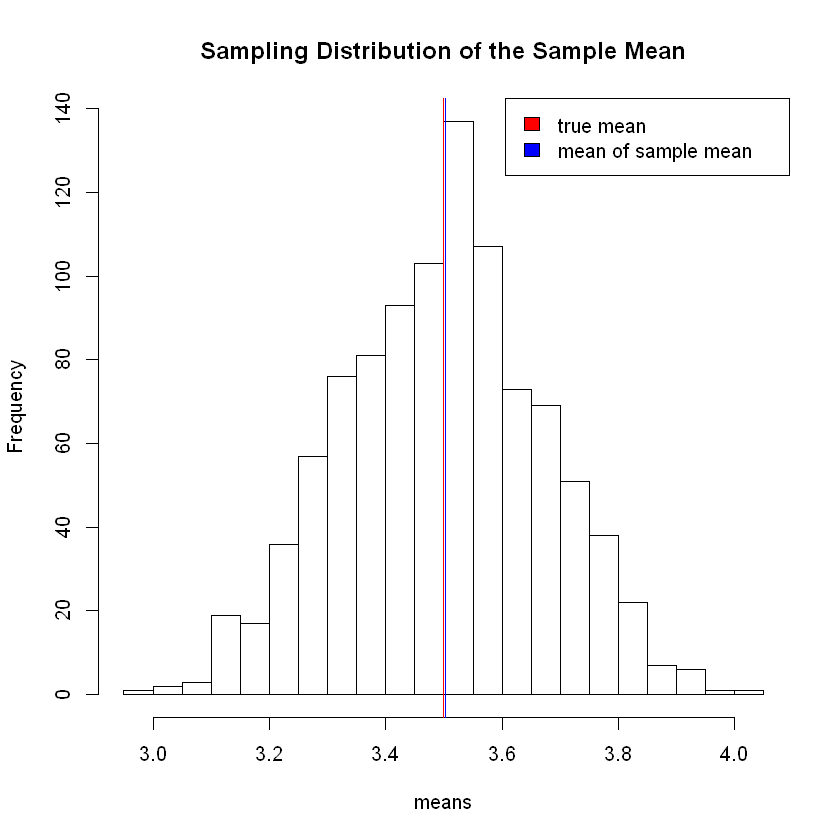

In [1]:
dice <- 1:6
num_sim <- 1000
sample_size <- 100
means <- matrix(data = NA, nrow = num_sim, ncol = 1)
for(i in 1:num_sim){
    sample <- sample(dice, sample_size, replace=TRUE)
    means[i] <- mean(sample)
}
# plot the sampling distribution of the sample mean
hist(means, breaks=20, main='Sampling Distribution of the Sample Mean')
abline(v=mean(dice),col='red')
abline(v=mean(means),col='blue')
legend('topright'，legend=c('true mean','mean of sample mean'),fill=c('red','blue'))

We create three linear data generation models below, each with a different $\epsilon$ distributions: one unif\~(-1,1), one N\~(0,2), one Exp\~(0.5). Then, we repeatedly sample from them 1000 times and plot the sampeling distribution of $\hat \beta_0$, $\hat \beta_1$ (so fun!).

In [82]:
# three linear data generation models with different error distributions
num_sim <- 1000
n <- 100
x <- runif(n, min=-5,max=5)
b0 <- -3
b1 <- 2
type_of_error <- c('uniform','normal','exponential')
output <- lapply(type_of_error, function(x) matrix(data=NA, nrow=num_sim, ncol=2))
# simulate sampling from each model
for(i in 1:num_sim){
    errors <- list(unif_error <- runif(n, min=-1,max=1),
                   norm_error <- rnorm(n, mean=0, sd=2),
                   exp_error <- rexp(n, rate=0.5))
    ys <- lapply(errors, function(error) b0+b1*x+error)
    slrs <- lapply(ys, function(y) lm(y~x))
    for(j in 1:length(slrs)){
        output[[j]][i, ] <- slrs[[j]]$coefficients
    }
}       

[[1]]
$breaks
 [1] -3.20 -3.18 -3.16 -3.14 -3.12 -3.10 -3.08 -3.06 -3.04 -3.02 -3.00 -2.98
[13] -2.96 -2.94 -2.92 -2.90 -2.88 -2.86 -2.84 -2.82 -2.80 -2.78

$counts
 [1]   1   0   6  14  28  40  54 100 108 145 124 123  92  81  37  26  12   6   2
[20]   0   1

$density
 [1] 0.05 0.00 0.30 0.70 1.40 2.00 2.70 5.00 5.40 7.25 6.20 6.15 4.60 4.05 1.85
[16] 1.30 0.60 0.30 0.10 0.00 0.05

$mids
 [1] -3.19 -3.17 -3.15 -3.13 -3.11 -3.09 -3.07 -3.05 -3.03 -3.01 -2.99 -2.97
[13] -2.95 -2.93 -2.91 -2.89 -2.87 -2.85 -2.83 -2.81 -2.79

$xname
[1] "output[[x]][, 1]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[2]]
$breaks
 [1] -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.0 -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3

$counts
 [1]   2   7  20  41  81 153 169 199 158  90  54  20   4   2

$density
 [1] 0.02 0.07 0.20 0.41 0.81 1.53 1.69 1.99 1.58 0.90 0.54 0.20 0.04 0.02

$mids
 [1] -3.65 -3.55 -3.45 -3.35 -3.25 -3.15 -3.05 -2.95 -2.85 -2.75 -2.65 -2.55
[13] -2.45 -2.35

$xname
[1] "output[[x]][, 1]"

$equidi

[[1]]
$breaks
 [1] 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.00 2.01 2.02 2.03 2.04 2.05 2.06 2.07
[16] 2.08

$counts
 [1]   4   8  36  50  85 160 170 178 136  89  43  22  15   3   1

$density
 [1]  0.4  0.8  3.6  5.0  8.5 16.0 17.0 17.8 13.6  8.9  4.3  2.2  1.5  0.3  0.1

$mids
 [1] 1.935 1.945 1.955 1.965 1.975 1.985 1.995 2.005 2.015 2.025 2.035 2.045
[13] 2.055 2.065 2.075

$xname
[1] "output[[x]][, 2]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[2]]
$breaks
 [1] 1.75 1.80 1.85 1.90 1.95 2.00 2.05 2.10 2.15 2.20 2.25 2.30

$counts
 [1]   5  28  68 148 256 224 171  72  22   5   1

$density
 [1] 0.10 0.56 1.36 2.96 5.12 4.48 3.42 1.44 0.44 0.10 0.02

$mids
 [1] 1.775 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275

$xname
[1] "output[[x]][, 2]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[3]]
$breaks
 [1] 1.70 1.75 1.80 1.85 1.90 1.95 2.00 2.05 2.10 2.15 2.20 2.25 2.30

$counts
 [1]   2   6  18  69 150 241 240 174  64  26   8   2

$density
 [1] 0.04 0.12 0

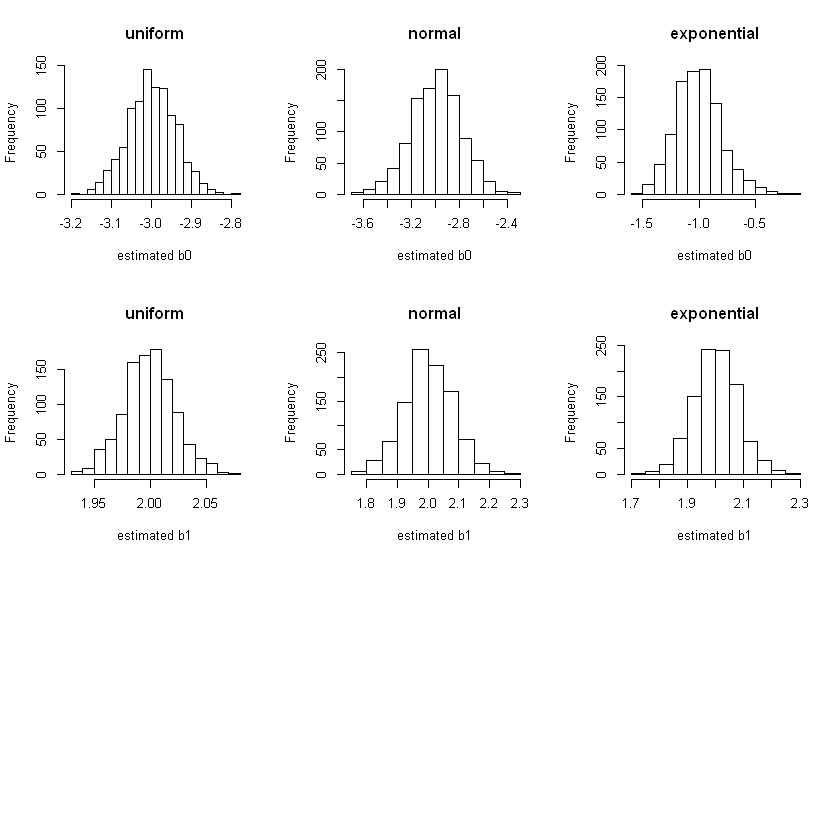

In [91]:
par(mfrow=c(3,3))
lapply(1:3,function(x) hist(output[[x]][ ,1],
                            main=type_of_error[x],
                            breaks=15,
                           xlab='estimated b0'))

lapply(1:3,function(x) hist(output[[x]][ ,2],
                            main=type_of_error[x],
                            breaks=15,
                           xlab='estimated b1'))  

## III. Inference on SLR Parameters & Estimating Uncertainties
The analytical solutions to $Var(\hat \beta_0)$, $Var(\hat \beta_1)$ are:
$$
Var(\hat \beta_0) = \sigma^2[\frac{1}{n}+\frac{\bar x^2}{\sum_i (x_i-\bar x)^2}]
$$
$$
Var(\hat \beta_1) = \frac{\sigma^2}{\sum_i(x_i-\bar x)^2}
$$
Using a bootstrap procedure allows us to use $Var(\hat \beta_i^{B}$ (the variance of the estimated betas we get from all bootstrap samples) as an estimate for the true variance of betas. 

In [108]:
# variance of observed beta1 hat and beta2 hat
observed_vars <- lapply(1:3, function(x) apply(output[[x]], 2, var))
# true variance of beta1 hat and beta2 hat using the analytical formula
sigma2 <- list(1/3, 4,4)
var_b1_hat <- function(sigma2){
    sigma2/sum((x-mean(x))^2)
}
var_b0_hat <- function(sigma2){
    sigma2*(1/2+mean(x)^2/sum((x-mean(x))^2))
}
true_vars_b1 <- lapply(sigma2, function(s2) s2/sum((x-mean(x))^2))
true_vars_b0 <- lapply(sigma2, function(s2) s2*(1/n+mean(x)^2/sum((x-mean(x))^2)))
true_vars <- cbind(true_vars_b0,true_vars_b1)
observed_vars
true_vars

[[1]]
[1] 0.0034516181 0.0005125372

[[2]]
[1] 0.042927715 0.006168281

[[3]]
[1] 0.041570373 0.006315991

true_vars_b0,true_vars_b1
0.003361732,0.0005199702
0.04034078,0.006239643
0.04034078,0.006239643


## IV. Prediction & Confidence Interval
The graph below shows the confidence band for the line of best fit created from 1000 bootstrap samples. Notice that the further away $x_i$ is from $\bar x$, the wider the band is vertically, implying a larger uncertainty.
Given a list of xs for which we would like to estimate their corresponding y values, we compute the variance of all the $\hat y$s predicted by the bootstrap procedure. The second graph supports our observation from the change in the vertical width of the confidence band.

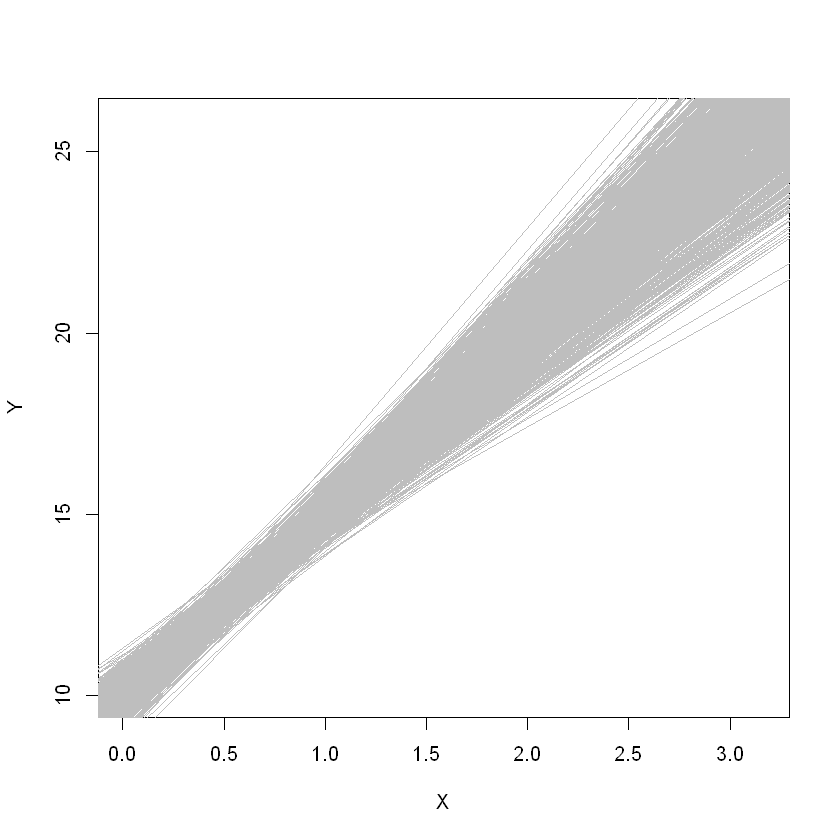

In [144]:
# Using the data generating model from previous code chunk
n <- 100
x <- rexp(n,rate=2)
b0 <- 10
b1 <- 5
plot(x,y=b0+b1*x,type='l',col='blue',ylab='Y',xlab='X')
poss_x <- rnorm(n, sd=1.5)
output <- matrix(NA, nrow=num_sim, ncol=n)

num_sim <- 1000
for(i in 1:num_sim){
    error <- rnorm(n, sd=3)
    y <- b0+b1*x+error
    slr <- lm(y~x)
    abline(a=slr$coefficients[1],b=slr$coefficients[2],col='grey')
    output[i, ] <- slr$coefficients[1]+slr$coefficients[2]*poss_x
}

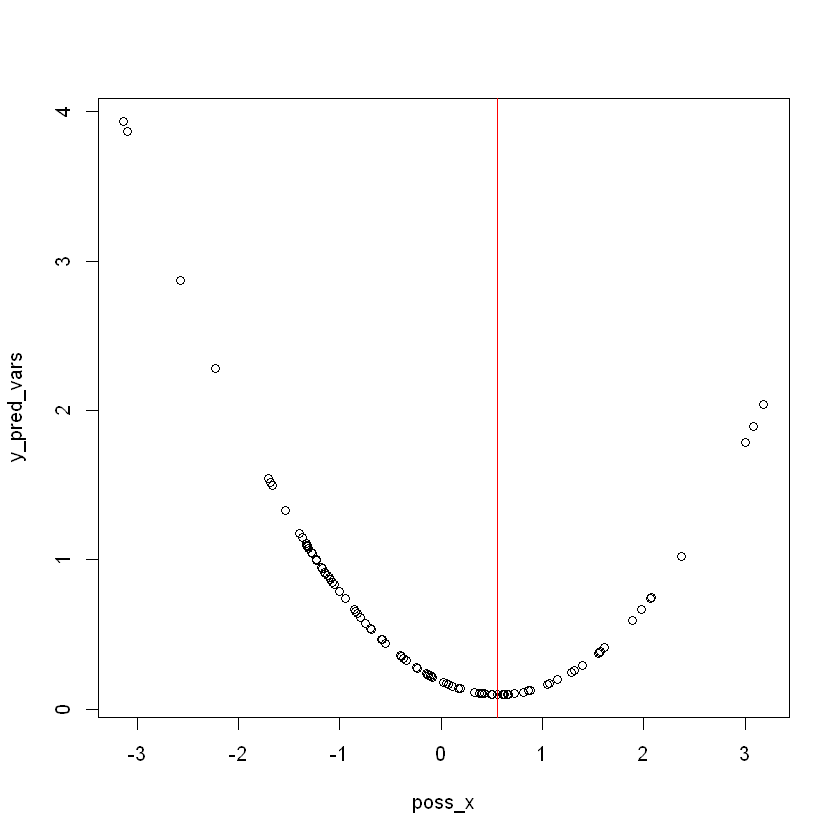

In [145]:
y_pred_vars <- apply(output, 2, var)
plot(poss_x, y_pred_vars)
abline(v=mean(x),col='red')

Now let's compare the confidence band resulting from bootstrap with the $(100-\alpha)%$ confidence interval for the predicted y $\hat y_{pred}$, which could be derived from SLR.\\
The 95% CI is:
$$
(\hat y_i + SE(\hat y_i)\times t(\frac{\alpha}{2};n-2), \hat y_i+SE(\hat y_i)\times t(1-\frac{\alpha}{2};n-2)),
$$
where $MSE = \frac{\sum_i (y_i-\hat y_i)^2}{n-2}$ and $t(q;n-2)$ is defined as $P(Z \leq t(q;n-2))=q$ for Z~t(n-2).

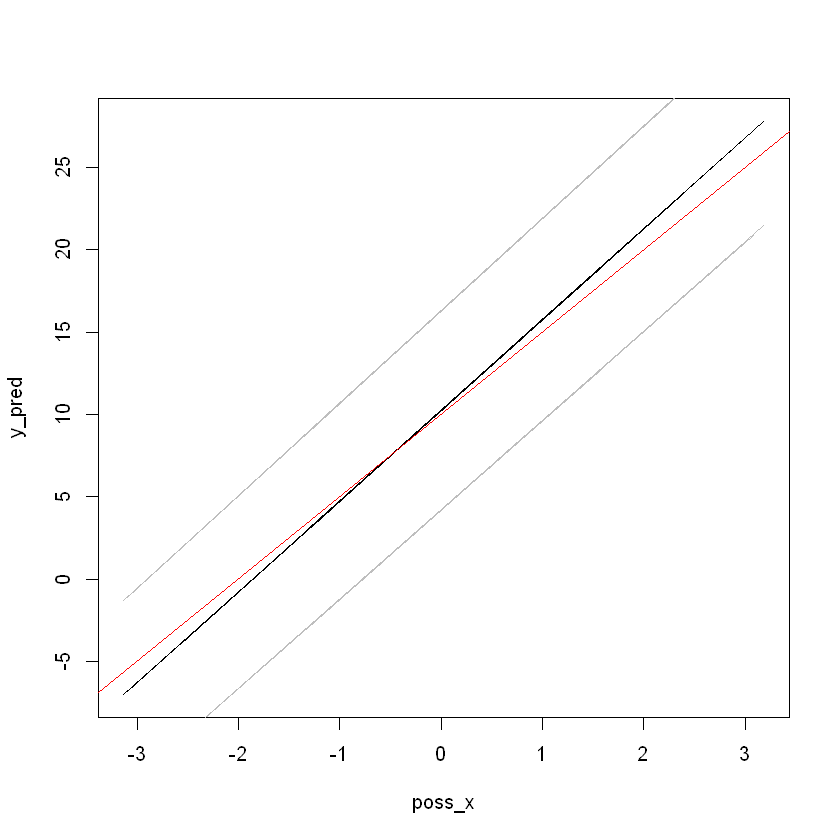

In [152]:
error <- rnorm(n, sd=3)
y <- b0+b1*x+error
slr <- lm(y~x)
y_pred <- slr$coefficients[1]+slr$coefficients[2]*poss_x
MSE <- sum(slr$residuals^2)/(n-2)
y_pred_sigma2 <- MSE*((n+1)/n+(poss_x-mean(x)^2)/sum((x-mean(x))^2))
pred_lower <- y_pred+sqrt(y_pred_sigma2)*qt(0.025,n-2)
pred_upper <- y_pred+sqrt(y_pred_sigma2)*qt(0.975,n-2)

plot(poss_x,y_pred,type='l')
abline(a=b0,b=b1,col='red')
lines(poss_x, pred_lower,col='grey')
lines(poss_x, pred_upper, col='grey')